# The proximal gradient method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Some utility functions

In [2]:
def soft_thresh(x, threshold):
    """Soft threshold function

    Inputs:
    x : variable
    threshold: scalar
    """

    return np.sign(x) * np.maximum(np.absolute(x) - threshold, np.zeros(np.shape(x)))

def calc_obj(X,y,beta,lam):
    """Objective function normalized""" 

    return (1 / np.shape(X)[0]) * (np.linalg.norm(y - np.dot(X, beta)))**2 + lam * np.sum(np.abs(beta))

def calc_grad(X,y,beta):

    grad = np.dot(np.dot(X.T, X), beta) - np.dot(X.T, y)

    return (2 / np.shape(X)[0]) * grad

def proximal_gradient(X,y,beta, gamma, lam, tol):
    """
    Solve lasso using proximal gradient.

    gamma: Parameter for proximal operator
    lam: Parameter for lasso
    tol  : Convergence tolerance
    """
    
    last_obj = float('inf')
    obj_change = float('inf')
    costs = []
    while obj_change > tol:
        grad = calc_grad(X,y,beta)
        
        u = beta - gamma * grad
        beta = soft_thresh(u,gamma * lam)
        
        current_obj = calc_obj(X,y,beta,lam)
        obj_change = abs(current_obj - last_obj)
        last_obj = current_obj
        costs.append(current_obj)

    return beta, costs

## Read data and perform optimization

In [3]:
X = pd.read_csv('diabetesX.csv')
y = pd.read_csv('diabetesY.csv',header=None)

# Add a column of 0.01's for the intercept. Chose 0.01 to be in a similar scale with other features
X['ones'] = 0.01* np.ones((X.shape[0],1))
y.describe()


,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [4]:
X = X.values
y = y.values

beta = np.random.rand(X.shape[1],1) 
lam = 0.000001
gamma = 10
tol = 0.001


beta, costs = proximal_gradient(X,y,beta, gamma, lam, tol)

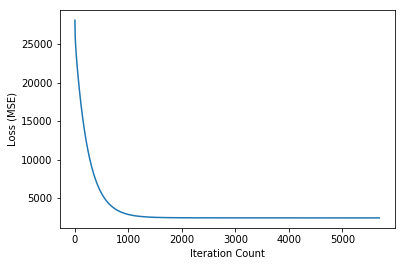

2435.57923977


In [10]:

plt.plot(costs, label = 'Proximal Gradient')
plt.ylabel('Loss (MSE)')
plt.xlabel('Iteration Count')
plt.show()

print(costs[-1])


## Results

The above figure shows how the loss function decreases as we perform more iterations. The minimum in-sample MSE we get from proximal gradient descent is 2435. This is very close to the optimal MSE obtained by the scikit-learn package (described in detail in [this notebook](https://github.com/bowenhua/SDS_385/blob/master/5_sparsity/lasso_CV.ipynb)).